#  Audio Classification using Deep Learning

## Importing Libraries 

In [1]:
#import basic libraries for preprocessing the data
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

In [2]:
# Libraries for Classification and building Models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
# Project Specific Libraries

import os
import librosa
import librosa.display
import glob 
import skimage

In [4]:
#define working directory
#So we dont have to explicitly define the path while importing the dataset and all the outputs will be stored is this directory
os.chdir('E:/Study/Machine Learning/MACHINE LEARNING DATASETS/UrbanSound8k')

## 1) Data Exploration and Visualisation

UrbanSound dataset:                                                                                            
For this project we will use a dataset called Urbansound8K. The dataset contains 8732 sound excerpts (<=4s) of urban sounds from 10 classes, which are:

-> Air Conditioner                                                                    
-> Car Horn                                                                                             
-> Children Playing                                                                                          
-> Dog bark                                                                                                       
-> Drilling                                                                                                   
-> Engine Idling                                                                                          
-> Gun Shot                                                                                                
-> Jackhammer                                                                                                   
-> Siren                                                                                                
-> Street Music                                                                            

The accompanying metadata contains a unique ID for each sound excerpt along with it's given class name.

In [5]:
metadata = pd.read_csv("UrbanSound8K.csv")

'''We will extract classes from this metadata.'''

metadata.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

Column Names:

-> slice_file_name: The name of the audio file. The name takes the following format: [fsID]-[classID]-[occurrenceID]-[sliceID].wav, where: [fsID] = the Freesound ID of the recording from which this excerpt (slice) is taken [classID] = a numeric identifier of the sound class (see description of classID below for further details) [occurrenceID] = a numeric identifier to distinguish different occurrences of the sound within the original recording [sliceID] = a numeric identifier to distinguish different slices taken from the same occurrence

-> fsID: The Freesound ID of the recording from which this excerpt (slice) is taken

-> start The start time of the slice in the original Freesound recording

-> end: The end time of slice in the original Freesound recording

-> salience: A (subjective) salience rating of the sound. 1 = foreground, 2 = background.

-> fold: The fold number (1-10) to which this file has been allocated.

-> classID: A numeric identifier of the sound class: 0 = air_conditioner 1 = car_horn 2 = children_playing 3 = dog_bark 4 = drilling 5 = engine_idling 6 = gun_shot 7 = jackhammer 8 = siren 9 = street_music

### Class Distribution

In [6]:
print(metadata['class'].value_counts())

engine_idling       1000
air_conditioner     1000
jackhammer          1000
children_playing    1000
street_music        1000
drilling            1000
dog_bark            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64


Here we can see the Class labels are unbalanced. Although 7 out of the 10 classes all have exactly 1000 samples, and siren is not far off with 929, the remaining two (car_horn, gun_shot) have significantly less samples at 43% and 37% respectively.

This will be a concern and something we may need to address later on.

## Auditory Inspection -  Playing some Random Samples

In [10]:

ipd.Audio('C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/fold1/14113-4-0-0.wav')

In [11]:
ipd.Audio('C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/fold2/14780-9-0-2.wav')

In [12]:
ipd.Audio('C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/fold3/9674-1-0-0.wav')

In [13]:
ipd.Audio('C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/fold4/7389-1-2-3.wav')

In [14]:
ipd.Audio('C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/fold5/17578-5-0-9.wav')

## Visual Inspection - Displaying the waveplot of Random Audios

We will load a sample from each class and visually inspect the data for any patterns. We will use librosa to load the audio file into an array then librosa.display and matplotlib to display the waveform.

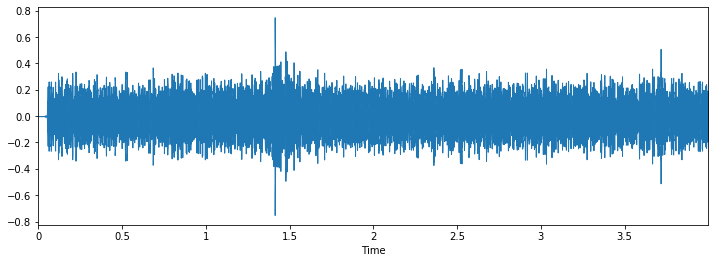

In [15]:
# Class: Air Conditioner

filename = 'C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/fold5/100852-0-0-0.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

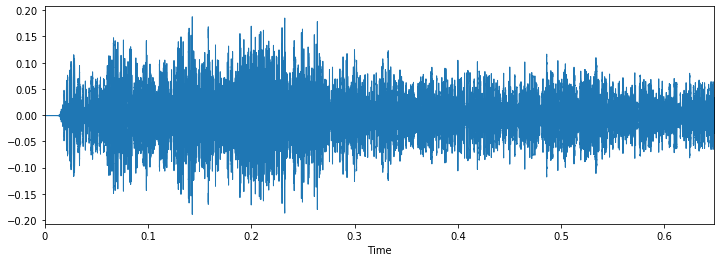

In [15]:
# Class: Car horn 

filename = 'C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/fold10/100648-1-0-0.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

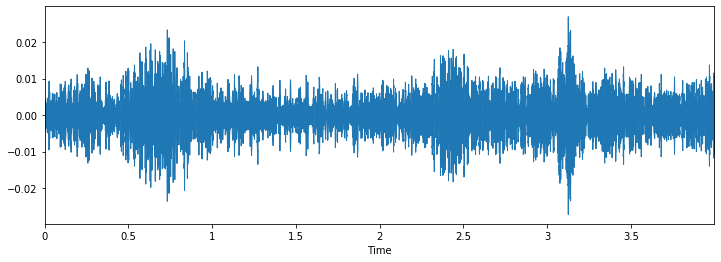

In [16]:
# Class: Children playing 

filename = 'C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/fold5/100263-2-0-117.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

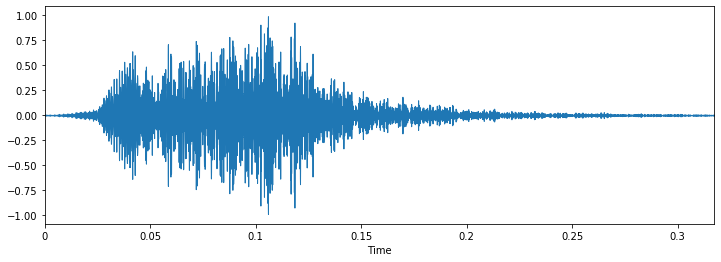

In [16]:
# Class: Dog bark

filename = 'C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/fold5/100032-3-0-0.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

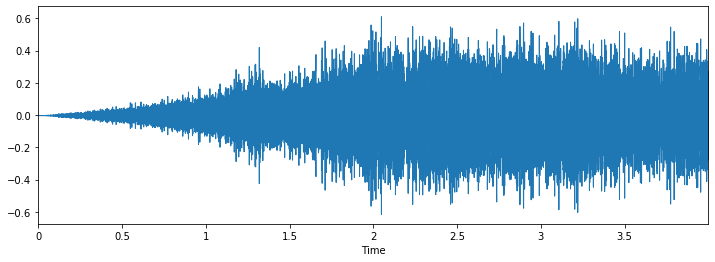

In [17]:
# Class: Drilling

filename = 'C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/fold3/103199-4-0-0.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

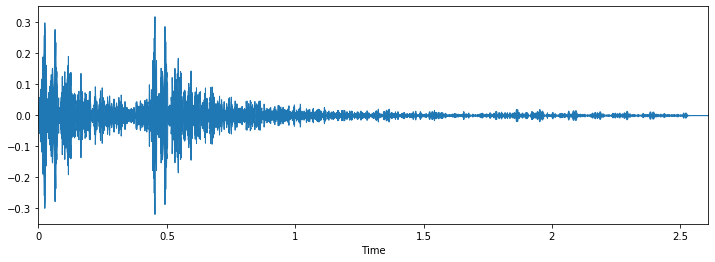

In [18]:
# Class: Gunshot

filename = 'C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/fold1/102305-6-0-0.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

### Observation:

From a visual inspection we can see that it is tricky to visualise the difference between some of the classes.

Particularly, the waveforms for reptitive sounds for air conditioner, drilling, engine idling and jackhammer are similar in shape.

Likewise the peak in the dog barking sample is simmilar in shape to the gun shot sample (albeit the samples differ in that there are two peaks for two gunshots compared to the one peak for one dog bark). Also, the car horn is similar too.

There are also similarities between the children playing and street music.

The human ear can naturally detect the difference between the harmonics, it will be interesting to see how well a deep learning model will be able to extract the necessary features to distinguish between these classes.

However, it is easy to differentiate from the waveform shape, the difference between certain classes such as dog barking and jackhammer.

## Audio Property of the samples

Next we will iterate through each of the audio sample files and extract, number of audio channels, sample rate and bit-depth.

In [19]:
import struct

class WavFileHelper():
    
    def read_file_properties(self, filename):

        wave_file = open(filename,"rb")
        
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]

        return (num_channels, sample_rate, bit_depth)

In [20]:

wavfilehelper = WavFileHelper()

audiodata = []
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath('C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k'),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    data = wavfilehelper.read_file_properties(file_name)
    audiodata.append(data)

# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

## Audio Channels

Most of the samples have two audio channels (meaning stereo) with a few with just the one channel (mono).

The easiest option here to make them uniform will be to merge the two channels in the stero samples into one by averaging the values of the two channels.

In [21]:
# num of channels 

print(audiodf.num_channels.value_counts(normalize=True))

2    0.915369
1    0.084631
Name: num_channels, dtype: float64


## Sample Rate 

There is a wide range of Sample rates that have been used across all the samples which is a concern (ranging from 96k to 8k).

This likley means that we will have to apply a sample-rate conversion technique (either up-conversion or down-conversion) so we can see an agnostic representation of their waveform which will allow us to do a fair comparison.

In [22]:
# sample rates 

print(audiodf.sample_rate.value_counts(normalize=True))

44100     0.614979
48000     0.286532
96000     0.069858
24000     0.009391
16000     0.005153
22050     0.005039
11025     0.004466
192000    0.001947
8000      0.001374
11024     0.000802
32000     0.000458
Name: sample_rate, dtype: float64


## Bit-Depth

There is also a wide range of bit-depths. It's likely that we may need to normalise them by taking the maximum and minimum amplitude values for a given bit-depth.

In [23]:
# bit depth

print(audiodf.bit_depth.value_counts(normalize=True))

16    0.659414
24    0.315277
32    0.019354
8     0.004924
4     0.001031
Name: bit_depth, dtype: float64


## Other audio properties to consider 

We may also need to consider normalising the volume levels (wave amplitude value) if this is seen to vary greatly, by either looking at the peak volume or the RMS volume.

##  2) Data Preprocessing and Data Splitting

### Audio properties that will require normalising
Following on from the previous notebook, we identifed the following audio properties that need preprocessing to ensure consistency across the whole dataset:

Audio Channels                                                                                
Sample rate                                                                                     
Bit-depth                                                                                             

We will continue to use Librosa which will be useful for the pre-processing and feature extraction.

### Preprocessing Stage

For much of the preprocessing we will be able to use Librosa's load() function.

We will compare the outputs from Librosa against the default outputs of scipy's wavfile library using a chosen file from the dataset.

### Sample rate conversion

By default, Librosa’s load function converts the sampling rate to 22.05 KHz which we can use as our comparison level.

In [24]:
import librosa 
from scipy.io import wavfile as wav
import numpy as np

filename = 'C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/fold5/100852-0-0-0.wav' 

librosa_audio, librosa_sample_rate = librosa.load(filename) 
scipy_sample_rate, scipy_audio = wav.read(filename) 

print('Original sample rate:', scipy_sample_rate) 
print('Librosa sample rate:', librosa_sample_rate)

Original sample rate: 44100
Librosa sample rate: 22050


### Bit-depth

Librosa’s load function will also normalise the data so it's values range between -1 and 1. This removes the complication of the dataset having a wide range of bit-depths.

In [25]:
print('Original audio file min~max range:', np.min(scipy_audio), 'to', np.max(scipy_audio))
print('Librosa audio file min~max range:', np.min(librosa_audio), 'to', np.max(librosa_audio))

Original audio file min~max range: -23628 to 27507
Librosa audio file min~max range: -0.50266445 to 0.74983937


### Merge audio channels

Librosa will also convert the signal to mono, meaning the number of channels will always be 1.

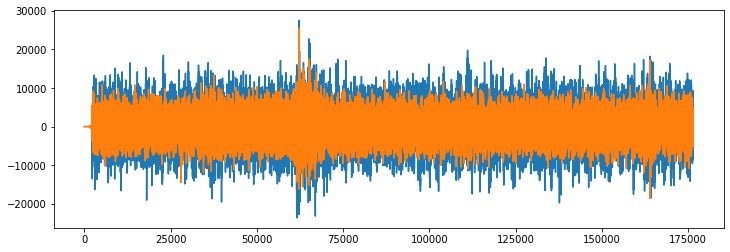

In [26]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)

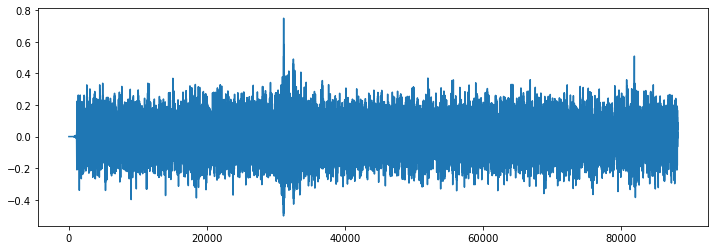

In [27]:
# Librosa audio with channels merged 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio)

## Extract Features 

As outlined in the proposal, we will extract Mel-Frequency Cepstral Coefficients (MFCC) from the the audio samples.

The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

### Extracting a MFCC

For this we will use Librosa's mfcc() function which generates an MFCC from time series audio data.

In [28]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


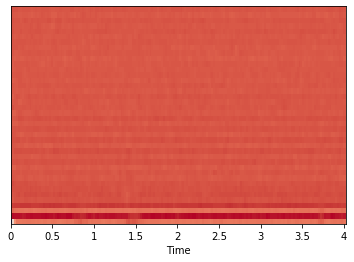

In [29]:
import librosa.display
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

### Extracting MFCC's for every file

We will now extract an MFCC for each audio file in the dataset and store it in a Panda Dataframe along with it's classification label.

In [33]:
def extract_features(file_name):
   
    (audio, sample_rate) = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccsscaled = np.mean(mfccs.T,axis=0)
    
    return mfccsscaled

In [34]:
# Load various imports 
import pandas as pd
import os
import librosa

# Set the path to the full UrbanSound dataset 
fulldatasetpath = 'C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k'

metadata = pd.read_csv('C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/UrbanSound8K.csv')

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    class_label = row["class"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')

featuresdf.to_csv(r'C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/features.csv', index=False, header=False)

Finished feature extraction from  8732  files


### Convert the data and labeling the data

We will use sklearn.preprocessing.LabelEncoder to encode the categorical text data into model-understandable numerical data.

In [7]:
featuresdf = pd.read_csv('features.csv')
features = featuresdf.iloc[:,0]
classes = featuresdf.iloc[:,1]
print(type(features))
print(type(classes))
print(features.shape)
print(classes.shape)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
(8731,)
(8731,)


In [8]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(features.tolist())
y = np.array(classes.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

Using TensorFlow backend.


### Splitting the data 

Here we will use sklearn.model_selection.train_test_split to split the dataset into training and testing sets. The testing set size will be 20% and we will set a random state.

In [9]:
# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [10]:
### store the preprocessed data for use in the next notebook

%store x_train 
%store x_test 
%store y_train 
%store y_test 
%store yy 
%store le

Stored 'x_train' (ndarray)
Stored 'x_test' (ndarray)
Stored 'y_train' (ndarray)
Stored 'y_test' (ndarray)
Stored 'yy' (ndarray)
Stored 'le' (LabelEncoder)


## 3) Creating MLP Neural Network

We will start with constructing a Multilayer Perceptron (MLP) Neural Network using Keras and a Tensorflow backend.

Starting with a sequential model so we can build the model layer by layer.

We will begin with a simple model architecture, consisting of four layers, an input layer, two hidden layer and an output layer. All three layers will be of the dense layer type which is a standard layer type that is used in many cases for neural networks.

The first layer will receive the input shape. As each sample contains 40 MFCCs (or columns) we have a shape of (1x40) this means we will start with an input shape of 40.

The first two layers will have 256 nodes. The activation function we will be using for our first 2 layers is the ReLU, or Rectified Linear Activation. This activation function has been proven to work well in neural networks.

We will also apply a Dropout value of 50% on our first two layers. This will randomly exclude nodes from each update cycle which in turn results in a network that is capable of better generalisation and is less likely to overfit the training data.

Our output layer will have 10 nodes (num_labels) which matches the number of possible classifications. The activation is for our output layer is softmax. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

### Compiling the model

For compiling our model, we will use the following three parameters:

Loss function - we will use categorical_crossentropy. This is the most common choice for classification. A lower score indicates that the model is performing better.

Metrics - we will use the accuracy metric which will allow us to view the accuracy score on the validation data when we train the model.

Optimizer - here we will use rmsprop which is a generally good optimizer for many use cases.

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

### Training 

Here we will train the model.

We will start with 100 epochs which is the number of times the model will cycle through the data. The model will improve on each cycle until it reaches a certain point.

We will also start with a low batch size, as having a large batch size can reduce the generalisation ability of the model.

In [190]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 100
num_batch_size = 32


num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/Weights/weights.best.basic_mlp.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Train on 6985 samples, validate on 1747 samples
Epoch 1/100
6985/6985 [==============================] - 2s 327us/step - loss: 8.9658 - accuracy: 0.1974 - val_loss: 2.1490 - val_accuracy: 0.2461

Epoch 00001: val_loss improved from inf to 2.14896, saving model to C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/Weights/weights.best.basic_mlp.hdf5
Epoch 2/100
6985/6985 [==============================] - 2s 279us/step - loss: 2.2683 - accuracy: 0.2564 - val_loss: 2.0084 - val_accuracy: 0.3171

Epoch 00002: val_loss improved from 2.14896 to 2.00844, saving model to C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/Weights/weights.best.basic_mlp.hdf5
Epoch 3/100
6985/6985 [==============================] - 2s 278us/step - loss: 2.0156 - accuracy: 0.2922 - val_loss: 1.8251 - val_accuracy: 0.3721

Epoch 00003: val_loss improved from 2.00844 to 1.82509, saving model to C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/Weights/weights.best.basic_mlp.hdf5
Ep

### Test the model

Here we will review the accuracy of the model on both the training and test data sets.

In [191]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])


score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9351467490196228
Testing Accuracy:  0.8809387683868408


### Predictions

Here we will build a method which will allow us to test the models predictions on a specified audio .wav file.

In [192]:
import librosa 
import numpy as np 

def extract_feature(file_name):
   
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None

    return np.array([mfccsscaled])

In [193]:
def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

### Validation

#### Test with sample data

Initial sainity check to verify the predictions using a subsection of the sample audio files we explored in the first notebook. We expect the bulk of these to be classified correctly.


In [194]:
# Class: Air Conditioner

filename = 'C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/fold10/11722-3-0-0.wav' 
print_prediction(filename)

The predicted class is: dog_bark 

air_conditioner 		 :  0.00000000000000000000000034960609
car_horn 		 :  0.00000000000000000000685275355089
children_playing 		 :  0.00000000000016371748249623119253
dog_bark 		 :  0.99982231855392456054687500000000
drilling 		 :  0.00000000000319098328489808569230
engine_idling 		 :  0.00000000000000000002014751216416
gun_shot 		 :  0.00000005805565805871992779430002
jackhammer 		 :  0.00000000000000000000000000000000
siren 		 :  0.00017772633873391896486282348633
street_music 		 :  0.00000000000000247376289882973634


# 4) Creating CNN Model

We will modify our model to be a Convolutional Neural Network (CNN) again using Keras and a Tensorflow backend.

Again we will use a sequential model, starting with a simple model architecture, consisting of four Conv2D convolution layers, with our final output layer being a dense layer.

The convolution layers are designed for feature detection. It works by sliding a filter window over the input and performing a matrix multiplication and storing the result in a feature map. This operation is known as a convolution.

The filter parameter specifies the number of nodes in each layer. Each layer will increase in size from 16, 32, 64 to 128, while the kernel_size parameter specifies the size of the kernel window which in this case is 2 resulting in a 2x2 filter matrix.

The first layer will receive the input shape of (40, 174, 1) where 40 is the number of MFCC's 174 is the number of frames taking padding into account and the 1 signifying that the audio is mono.

The activation function we will be using for our convolutional layers is ReLU which is the same as our previous model. We will use a smaller Dropout value of 20% on our convolutional layers.

Each convolutional layer has an associated pooling layer of MaxPooling2D type with the final convolutional layer having a GlobalAveragePooling2D type. The pooling layer is do reduce the dimensionality of the model (by reducing the parameters and subsquent computation requirements) which serves to shorten the training time and reduce overfitting. The Max Pooling type takes the maximum size for each window and the Global Average Pooling type takes the average which is suitable for feeding into our dense output layer.

Our output layer will have 10 nodes (num_labels) which matches the number of possible classifications. The activation is for our output layer is softmax. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

### Feature Extraction refinement

In the prevous feature extraction stage, the MFCC vectors would vary in size for the different audio files (depending on the samples duration).

However, CNNs require a fixed size for all inputs. To overcome this we will zero pad the output vectors to make them all the same size.

In [68]:
import numpy as np
max_pad_len = 174

def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

In [69]:
# Load various imports 
import pandas as pd
import os
import librosa

# Set the path to the full UrbanSound dataset 
fulldatasetpath = 'C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k'

metadata = pd.read_csv('C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/UrbanSound8K.csv')

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    class_label = row["class"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')

featuresdf.to_csv(r'C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/features_cnn.csv', index=False, header=False)

Finished feature extraction from  8732  files


In [31]:
featuresdf1 = pd.read_csv("E:/Study/Machine Learning/MACHINE LEARNING DATASETS/UrbanSound8k/features_cnn.csv")
#featuresdf1.head()

In [32]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf1.feature.tolist())
y = np.array(featuresdf1.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

AttributeError: 'DataFrame' object has no attribute 'feature'

In [34]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_rows = 40
num_columns = 174
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax'))


ValueError: cannot reshape array of size 6984 into shape (6984,40,174,1)

In [80]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [81]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 39, 173, 16)       80        
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 19, 86, 16)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 19, 86, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 18, 85, 32)        2080      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 9, 42, 32)         0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 9, 42, 32)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 41, 64)       

### Training 

Here we will train the model. As training a CNN can take a sigificant amount of time, we will start with a low number of epochs and a low batch size. If we can see from the output that the model is converging, we will increase both numbers.

In [82]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

#num_epochs = 12
#num_batch_size = 128

num_epochs = 72
num_batch_size = 256

checkpointer = ModelCheckpoint(filepath='C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/weights_cnn/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Train on 6985 samples, validate on 1747 samples
Epoch 1/72
1792/6985 [======>.......................] - ETA: 55s - loss: 0.4292 - accuracy: 0.8410

KeyboardInterrupt: 

In [83]:
model.load_weights('C:/Users/Admin/Desktop/MACHINE LEARNING DATASETS/UrbanSound8k/weights_cnn/weights.best.basic_cnn.hdf5')

In [84]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9183965921401978
Testing Accuracy:  0.8723526000976562


### Predictions

Here we will modify our previous method for testing the models predictions on a specified audio .wav file.


In [85]:
def print_prediction(file_name):
    prediction_feature = extract_features(file_name) 
    prediction_feature = prediction_feature.reshape(1, num_rows, num_columns, num_channels)

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

### Validation

#### Testing the model with new data

As before we will verify the predictions using a subsection of the sample audio files we explored in the first notebook. We expect the bulk of these to be classified correctly.

In [88]:
# Class: Children Playing

filename = 'C:/Users/Admin/Desktop/test music/children_playing1.wav' 
print_prediction(filename)

The predicted class is: children_playing 

air_conditioner 		 :  0.00000071138299517770064994692802
car_horn 		 :  0.00046420926810242235660552978516
children_playing 		 :  0.97056847810745239257812500000000
dog_bark 		 :  0.01340971142053604125976562500000
drilling 		 :  0.00009910655353451147675514221191
engine_idling 		 :  0.00000035894251482204708736389875
gun_shot 		 :  0.00000001996405529780531651340425
jackhammer 		 :  0.00000465024049844942055642604828
siren 		 :  0.00247447844594717025756835937500
street_music 		 :  0.01297827996313571929931640625000


In [89]:
# Class: Children Playing

filename = 'C:/Users/Admin/Desktop/test music/children_playing2.wav' 
print_prediction(filename)

The predicted class is: children_playing 

air_conditioner 		 :  0.00318141351453959941864013671875
car_horn 		 :  0.00016227713786065578460693359375
children_playing 		 :  0.45095670223236083984375000000000
dog_bark 		 :  0.03834697231650352478027343750000
drilling 		 :  0.01400015503168106079101562500000
engine_idling 		 :  0.00692072836682200431823730468750
gun_shot 		 :  0.00001876048554549925029277801514
jackhammer 		 :  0.01397144887596368789672851562500
siren 		 :  0.29171031713485717773437500000000
street_music 		 :  0.18073123693466186523437500000000


In [90]:
# Class: Dog Bark

filename = 'C:/Users/Admin/Desktop/test music/dogbark1.wav' 
print_prediction(filename)

The predicted class is: dog_bark 

air_conditioner 		 :  0.00000000109637832146347591333324
car_horn 		 :  0.00000000010924283699864645313937
children_playing 		 :  0.00487655680626630783081054687500
dog_bark 		 :  0.99463260173797607421875000000000
drilling 		 :  0.00000030519211691171221900731325
engine_idling 		 :  0.00000007101368026951604406349361
gun_shot 		 :  0.00000001966971474587353441165760
jackhammer 		 :  0.00000000000158163065977490191472
siren 		 :  0.00006309667514869943261146545410
street_music 		 :  0.00042728154221549630165100097656


In [93]:
# Class: Engine 

filename = 'C:/Users/Admin/Desktop/test music/engine1.wav' 
print_prediction(filename)

The predicted class is: engine_idling 

air_conditioner 		 :  0.00000767119490774348378181457520
car_horn 		 :  0.00002992221743625123053789138794
children_playing 		 :  0.00088274752488359808921813964844
dog_bark 		 :  0.00013573600153904408216476440430
drilling 		 :  0.00089753256179392337799072265625
engine_idling 		 :  0.99751389026641845703125000000000
gun_shot 		 :  0.00002299479456269182264804840088
jackhammer 		 :  0.00021194477449171245098114013672
siren 		 :  0.00000364124844054458662867546082
street_music 		 :  0.00029400570201687514781951904297


In [92]:
# Class: Car_horn

filename = 'C:/Users/Admin/Desktop/test music/horn1.wav' 
print_prediction(filename)

The predicted class is: car_horn 

air_conditioner 		 :  0.00006352290802169591188430786133
car_horn 		 :  0.52669477462768554687500000000000
children_playing 		 :  0.05429073795676231384277343750000
dog_bark 		 :  0.11155704408884048461914062500000
drilling 		 :  0.08168549835681915283203125000000
engine_idling 		 :  0.19771777093410491943359375000000
gun_shot 		 :  0.00343339540995657444000244140625
jackhammer 		 :  0.00001186032659461488947272300720
siren 		 :  0.00377167249098420143127441406250
street_music 		 :  0.02077378332614898681640625000000


In [121]:
# Class: Car_horn

filename = 'C:/Users/Admin/Desktop/test music/dogbark3.wav' 
print_prediction(filename)

The predicted class is: dog_bark 

air_conditioner 		 :  0.00000000130531996322957866141223
car_horn 		 :  0.00000000000948908920189728277705
children_playing 		 :  0.00049744843272492289543151855469
dog_bark 		 :  0.99945074319839477539062500000000
drilling 		 :  0.00000003044742413749190745875239
engine_idling 		 :  0.00000009550171142791441525332630
gun_shot 		 :  0.00000000021975993247380642969802
jackhammer 		 :  0.00000000000022353644000931705005
siren 		 :  0.00003917818685295060276985168457
street_music 		 :  0.00001248663465958088636398315430
